In [20]:
import IO
import numpy as np
import matplotlib.pyplot as plt
import file_path
import os, matplotlib
import IO
%matplotlib inline
DOWN, UP=0,1

### Cubic Lattice

In [4]:
def HTE_cubic(beta, order):
    if order >= 8:
        print "Not implemented!"
        return
    
    r = 3.0/4.0  #s(s+1)
    Coeff=np.zeros(8)
    Coeff[0] = r/3
    Coeff[1] = -2*r**2.0/3
    Coeff[2] = 1.0/18*r**2.0*(-3.0+20*r)
    Coeff[3] = -1.0/135*r**2.0*(6.0-91*r+224*r**2.0)
    Coeff[4] = 1.0/1080*r**2.0*(-15.0+376*r-1816*r**2.0+2544*r**3.0)
    Coeff[5] = -1.0/14175*r**2.0*(72.0-2406*r+18909*r**2.0-47188*r**3.0
            +46848.0*r**4.0)
    Coeff[6] = 1.0/2041200*r**2.0*(-4347.0+176346*r-1901709*r**2.0
            +7300134*r**3.0-11982944.0*r**4.0+9482624*r**5.0)
    Coeff[7] = -1.0/61236000*r**2.0*(61560.0-2887056*r+38320749*r**2.0
            -202461642*r**3.0+477409712.0*r**4.0-601876480*r**5.0
            + 399408640*r**6.0)

    Chi = 0.0
    for i in range(order):
        Chi += 3.0*Coeff[i]*(beta)**(i+1.0)
    return Chi

In [13]:
T_list = np.linspace(0.5, 5.0, 100)
HTE_list = np.zeros((5, len(T_list)))
for t in range(len(T_list)):
    for i in range(4):
        order = i + 4
        HTE_list[i,t] = HTE_cubic(1.0/T_list[t], order)

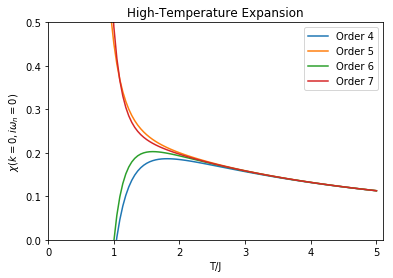

In [15]:
plt.figure()
for i in range(4):
    plt.plot(T_list, HTE_list[i], label="Order "+str(i+4))
#y=[0.0937,]*MaxTauBin
#plt.plot(TGrid, y, 'k--', label="Unbiased MC")
plt.ylim([0.0,0.5])
plt.xlim([0.0, 5.1])
plt.xlabel("T/J")
plt.ylabel(r"$\chi(k=0, i\omega_n=0)$")
plt.legend()
plt.title("High-Temperature Expansion")

plt.savefig("cubic_High-Temperature.pdf")
plt.show()